In [249]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Personal Laptop Path
os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\Data\\Kaggle\\HousePricePrediction')
hp=pd.read_csv('house_pricing_kaggle.csv',sep='|')
hp.head()

In [302]:
## Office Laptop Path
os.chdir('C:\\Users\\Prudhvi\\Desktop\Prudhvi\\Data Science\\Kaggle')
hp=pd.read_csv('house_pricing_kaggle.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [303]:
# Derving the columns
hp['YearBuilt']=2018-hp['YearBuilt']
hp['YearRemodAdd']=2018-hp['YearRemodAdd']

## Imputing missing with the intution on the dataset
hp['BsmtQual'].fillna(value='No Basement',inplace=True)
hp['BsmtCond'].fillna(value='No Basement',inplace=True)
hp['BsmtExposure'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType1'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType2'].fillna(value='No Basement',inplace=True)
hp['GarageType'].fillna(value='No Garage',inplace=True)
hp['GarageYrBlt'].fillna(value='9999',inplace=True)
hp['GarageFinish'].fillna(value='No Garage',inplace=True)
hp['GarageQual'].fillna(value='No Garage',inplace=True)
hp['GarageCond'].fillna(value='No Garage',inplace=True)
hp['FireplaceQu'].fillna(value='No FirePlace',inplace=True)
hp['MasVnrType'].fillna(value='None',inplace=True)
hp['MasVnrArea'].fillna(value=0,inplace=True)
hp['LotFrontage'].fillna(value=0,inplace=True)
hp['Electrical'].fillna(value='None',inplace=True)

In [304]:
## Function to find the dimensions which has only one unique column
def drop_column(x,dimensions):
    for i in dimensions:
        x.drop(i,axis=1, inplace=True)
        
#  Function to the dimension which contains only one unique values
def drop_unique(x):
    unique_dimensions=[]
    z=0
    for i in x.columns:
        if(x[i].nunique==1):
            x.drop(i,axis=1,inplace=2)
            z+=1
    print('Total # of columns which has only one record: ',z)

## Function to covert the data type of the columns
def datatypecoversion(coversion_list,x,datatype):
    for i in coversion_list:
        x[i]=x[i].astype(datatype)

## FUNCTION TO GET THE NUMERIC DATATYPE DIMENSIONS
def numeric_datatype(x):
    numeric_dimensions=[]
    for i in x.columns:
        if(x[i].dtype=='int64' or x[i].dtype=='float64'):
            numeric_dimensions.append(i) 
    return numeric_dimensions

def object_datatype(x):
    object_dimensions=[]
    for i in x.columns:
        if(x[i].dtype=='object'):
            object_dimensions.append(i) 
    return object_dimensions

## Function to Get the Dimension which dont have correlation between -0.5 to 0.5 with the Output Variable
## Prerequisite: Execute the numeric function before using this function

def correlation(x,numeric_dimensions,output_dim):
    deleted_correlation=[]
    for i in numeric_dimensions:
        if(i != output_dim):
            a=x[[i,output_dim]].corr()
            a.loc[i,output_dim]
            if((a.loc[i,output_dim]> -0.5) and (a.loc[i,output_dim]<0.5)):
                print('Correlation ',i,' vs', output_dim,':',a.loc[i,output_dim])
                hp.drop(i,axis=1,inplace=True)
                deleted_correlation.append(i)
    #return deleted_correlation
   # print('Dimensions which has high correlation with the ', output_dim,' variable are',x.select_dtypes(include=[x.number]).dtypes)


In [305]:
dimensions=['PoolQC','Fence','Alley','MiscFeature','Id','YrSold','YearBuilt','YearRemodAdd','Utilities','1stFlrSF','TotRmsAbvGrd']
## Calling drop_column function
drop_column(hp,dimensions)

# Calling drop unique function
drop_unique(hp)

## Calling datatypeconversion function
conversion_list=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
                 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MoSold']
datatypecoversion(conversion_list,hp,'object')

# Calling Numeric_dimensions function
numeric_dimensions=numeric_datatype(hp)
# Calling correlation function
correlation(hp,numeric_dimensions,'SalePrice')

Total # of columns which has only one record:  0
Correlation  MSSubClass  vs SalePrice : -0.08428413512659523
Correlation  LotFrontage  vs SalePrice : 0.20962394479948315
Correlation  LotArea  vs SalePrice : 0.2638433538714063
Correlation  MasVnrArea  vs SalePrice : 0.47261449900457725
Correlation  BsmtFinSF1  vs SalePrice : 0.38641980624215627
Correlation  BsmtFinSF2  vs SalePrice : -0.011378121450215216
Correlation  BsmtUnfSF  vs SalePrice : 0.214479105546969
Correlation  2ndFlrSF  vs SalePrice : 0.31933380283206614
Correlation  LowQualFinSF  vs SalePrice : -0.02560613000068015
Correlation  WoodDeckSF  vs SalePrice : 0.32441344456813076
Correlation  OpenPorchSF  vs SalePrice : 0.31585622711605577
Correlation  EnclosedPorch  vs SalePrice : -0.12857795792595636
Correlation  3SsnPorch  vs SalePrice : 0.04458366533574792
Correlation  ScreenPorch  vs SalePrice : 0.11144657114291048
Correlation  PoolArea  vs SalePrice : 0.09240354949187278
Correlation  MiscVal  vs SalePrice : -0.0211895796

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Condition1', 'Condition2', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


C:\Users\Prudhvi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


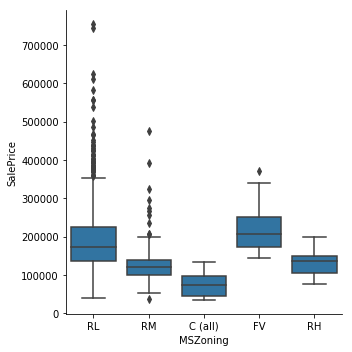

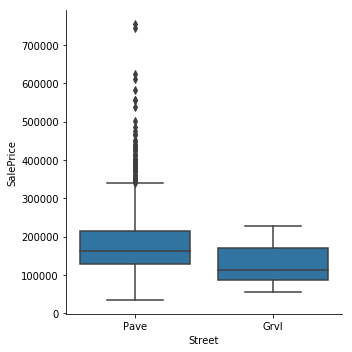

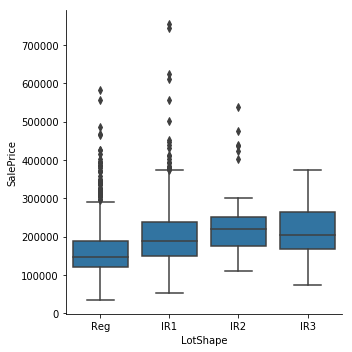

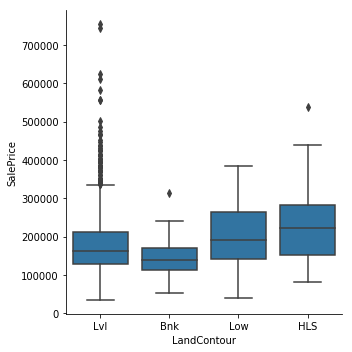

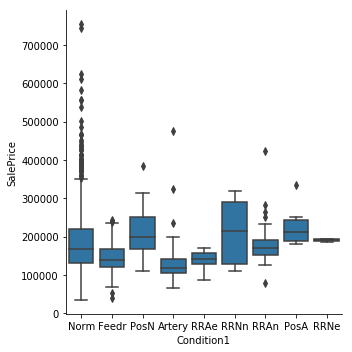

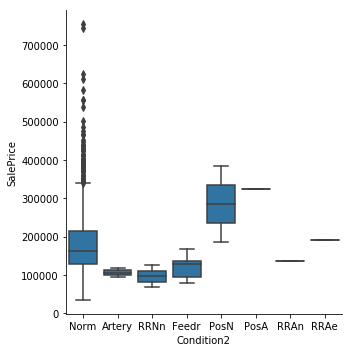

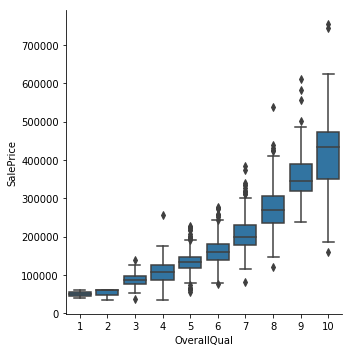

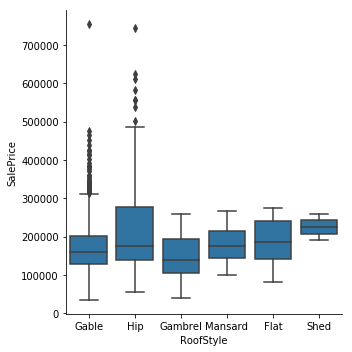

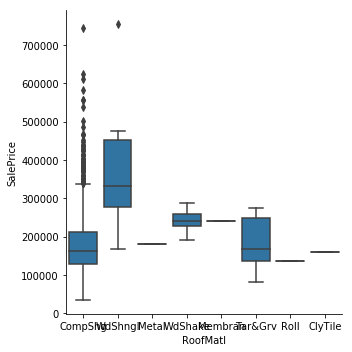

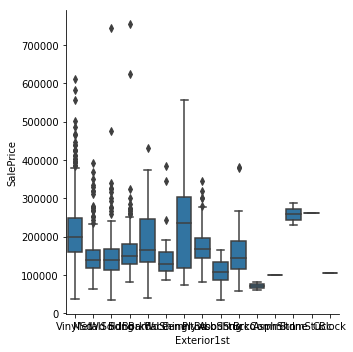

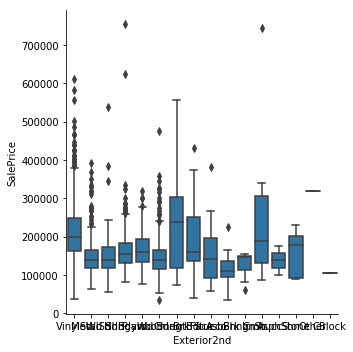

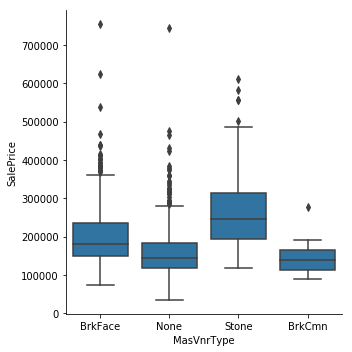

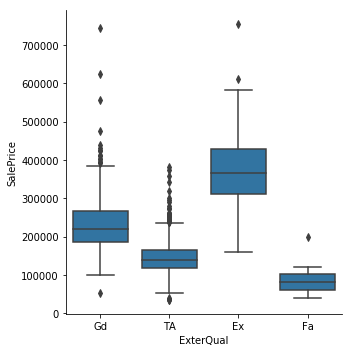

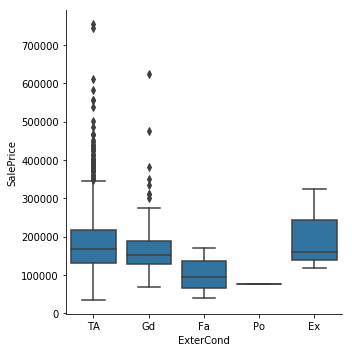

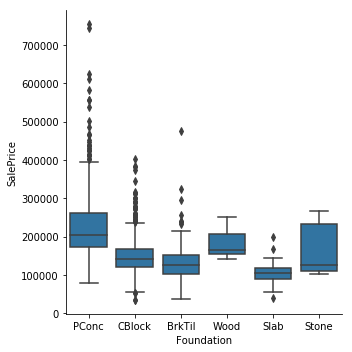

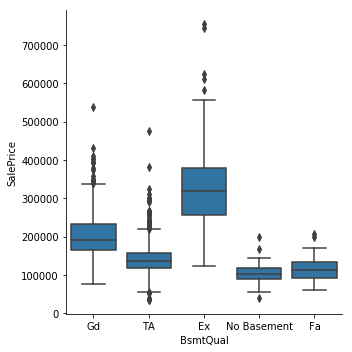

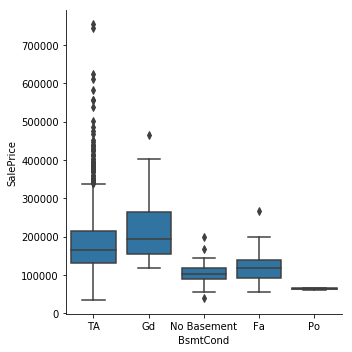

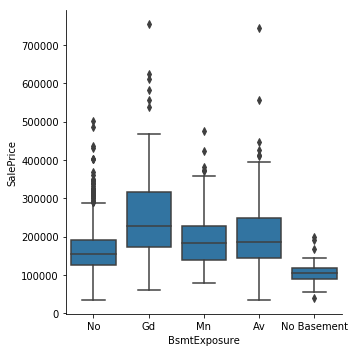

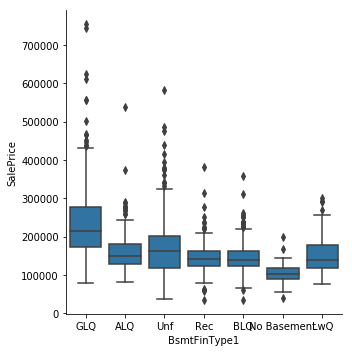

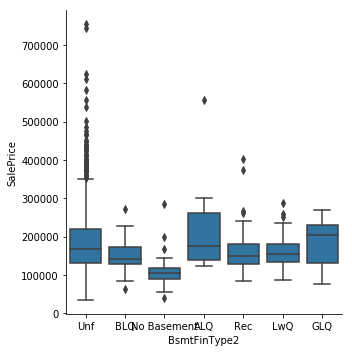

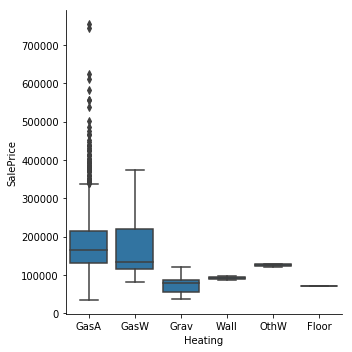

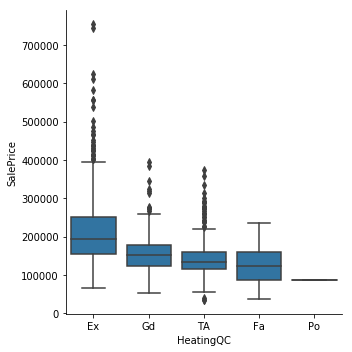

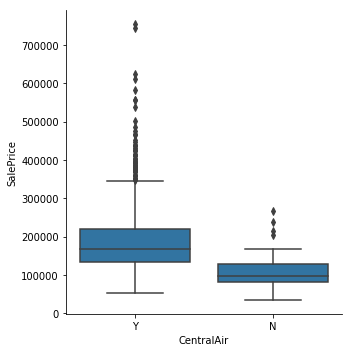

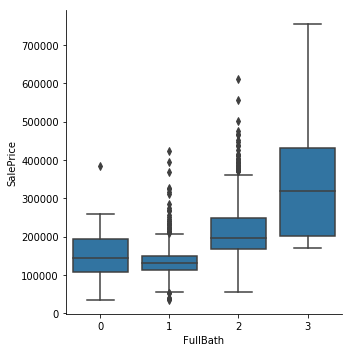

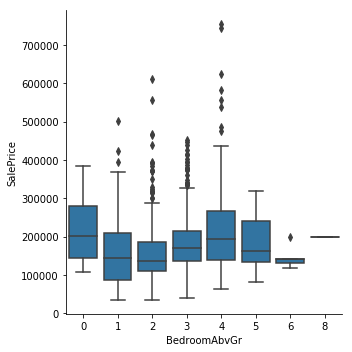

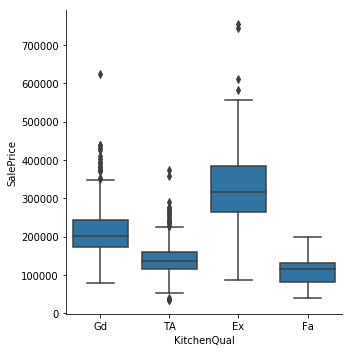

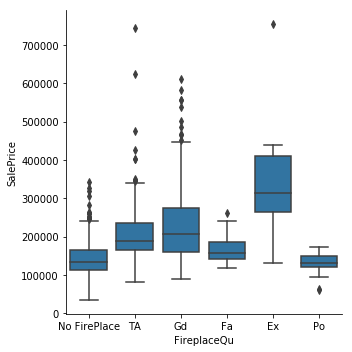

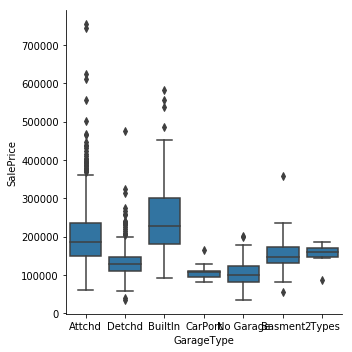

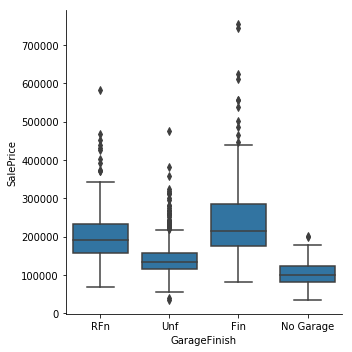

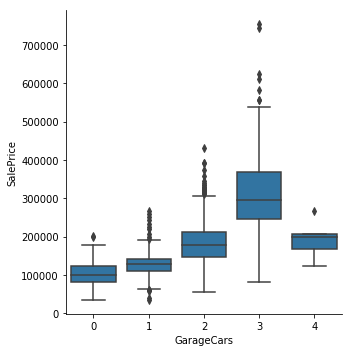

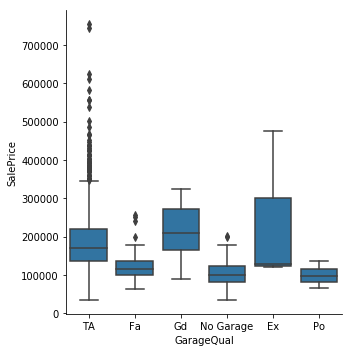

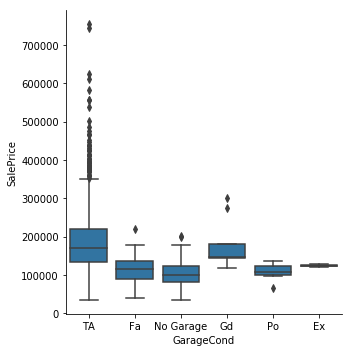

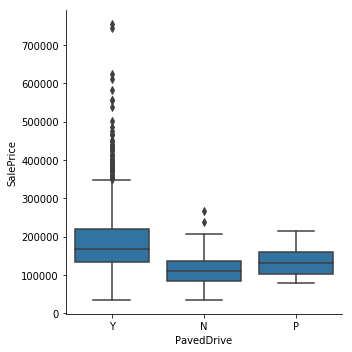

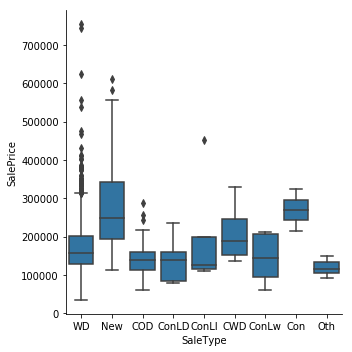

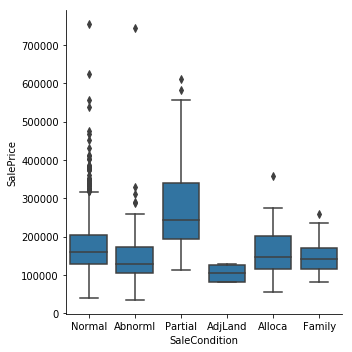

In [309]:
categorical=object_datatype(hp)
print(categorical)

for i in categorical:
    sns.FacetGrid(hp,size=5)\
    .map(sns.boxplot,i,'SalePrice')\
    .add_legend
    plt.show()

In [307]:
pd.crosstab(index=hp['Electrical'],columns='count')
cat_dim_drop=['LandSlope','LotConfig','MoSold','GarageYrBlt','Fireplaces','Functional','KitchenAbvGr','HalfBath','BsmtHalfBath','BsmtFullBath','Electrical','OverallCond','HouseStyle','BldgType','Neighborhood','Exterior1st','Exterior2nd']
drop_column(hp,cat_dim_drop)

In [320]:
nominal=['MSZoning','Street','LandContour','Condition1','Condition2','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating','CentralAir','GarageType','SaleType','SaleCondition']
ordinal=['LotShape','OverallQual','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','FullBath','BedroomAbvGr','KitchenQual','FireplaceQu','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive']

In [338]:
datatypecoversion(ordinal,hp,'category')

In [339]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
#lc = LabelEncoder()
encoding=defaultdict(LabelEncoder)
encoded_df=pd.DataFrame()
for i in ordinal:
    encoding[i].fit(hp[i])
    d=pd.DataFrame(encoding[i].transform(hp[i]))
    hp[i]=d
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    #d.columns=list1
    #encoded_df=pd.concat([encoded_df,d],axis=1)


In [ ]:
#http://pbpython.com/categorical-encoding.html

In [342]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
encoded_df=pd.DataFrame()
for i in nominal:
    d=pd.DataFrame(encoding[i].fit_transform(hp[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)

hp=pd.concat([encoded_df,hp],axis=1)